# Tests for Build_OBM
This file is meant to test out individual code before scripting in the main repo. Do not use for running the occupant behavior model.

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
import csv

In [2]:
# Read a DyD file
df = pd.read_csv("C:/devel/Build_OBM/data/home_1.csv")
df.head(3)

,Unnamed: 0,Schedule,Event,T_ctrl [oF],T_stp_cool [oF],T_stp_heat [oF],Humidity,HumidityExpectedLow,HumidityExpectedHigh,Thermostat_Temperature [oF],...,Remote_Sensor_9_Temperature [oF],Remote_Sensor_9_Motion,Remote_Sensor_10_Temperature [oF],Remote_Sensor_10_Motion,Remote_Sensor_11_Temperature [oF],Remote_Sensor_11_Motion,Remote_Sensor_12_Temperature [oF],Remote_Sensor_12_Motion,Remote_Sensor_13_Temperature [oF],Remote_Sensor_13_Motion
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.4,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0


## Preprocessing data

In [3]:
# varInfo_1 = {'Unnamed: 0': 'DateTime' ,'Event': 'event' ,'Humidity': 'hum' ,'HumidityExpectedHigh': 'humExpHi' ,'HumidityExpectedLow': 'humExpLo' ,'RH_out': 'RH_out' ,'Remote_Sensor_1_Motion': 'RS1Mo' ,'Remote_Sensor_1_Temperature [oF]': 'RS1T' ,'Remote_Sensor_2_Motion': 'RS2Mo' ,'Remote_Sensor_2_Temperature [oF]': 'RS2T','Remote_Sensor_3_Motion': 'RS3Mo' ,'Remote_Sensor_3_Temperature [oF]': 'RS3T' ,'Remote_Sensor_4_Motion': 'RS4Mo' ,'Remote_Sensor_4_Temperature [oF]': 'RS4T' ,'Remote_Sensor_5_Motion': 'RS5Mo' ,'Remote_Sensor_5_Temperature [oF]': 'RS5T' ,'Remote_Sensor_6_Motion': 'RS6Mo' ,'Remote_Sensor_6_Temperature [oF]': 'RS6T' ,'Remote_Sensor_7_Motion': 'RS7Mo' ,'Remote_Sensor_7_Temperature [oF]': 'RS7T' ,'Remote_Sensor_8_Motion': 'RS8Mo' ,'Remote_Sensor_8_Temperature [oF]': 'RS8T','Remote_Sensor_9_Motion': 'RS9T' ,'Remote_Sensor_9_Temperature [oF]': 'RS9Mo' ,'Remote_Sensor_10_Motion': 'RS10T' ,'Remote_Sensor_10_Temperature [oF]': 'RS10Mo' ,'Remote_Sensor_11_Motion': 'RS11T' ,'Remote_Sensor_11_Temperature [oF]': 'RS11Mo' ,'Remote_Sensor_12_Motion': 'RS12T' ,'Remote_Sensor_12_Temperature [oF]': 'RS12Mo' ,'Remote_Sensor_13_Motion': 'RS13T' ,'Remote_Sensor_13_Temperature [oF]': 'RS13Mo' ,'Schedule': 'schedule' ,'T_ctrl [oF]': 'T_ctrl' ,'T_out [oF]': 'T_out' ,'T_stp_cool [oF]': 'T_stp_cool' ,'T_stp_heat [oF]': 'T_stp_heat' ,'Thermostat_Motion': 'TSMo' ,'Thermostat_Temperature [oF]': 'TST' ,'auxHeat1 [sec]': 'auxHeat1' ,'auxHeat2 [sec]': 'auxHeat2' ,'auxHeat3 [sec]': 'auxHeat3' ,'compCool1 [sec]': 'cmpCool1' ,'compCool2 [sec]': 'cmpCool2' ,'compCool3 [sec]': 'cmpCool3' ,'compHeat1 [sec]': 'cmpHeat1' ,'compHeat2 [sec]': 'cmpHeat2' ,'compHeat3 [sec]': 'cmpHeat3' ,'dehumidifier': 'dehumidifier','fan [sec]': 'fan' ,'humidifier': 'humidifier' ,'ventilator': 'ventilator'}
varInfo = { 'Header in CSV':['Unnamed: 0', 'Event','Humidity', 'HumidityExpectedHigh', 'HumidityExpectedLow','RH_out','Remote_Sensor_1_Motion','Remote_Sensor_1_Temperature [oF]','Remote_Sensor_2_Motion','Remote_Sensor_2_Temperature [oF]','Remote_Sensor_3_Motion','Remote_Sensor_3_Temperature [oF]',
'Remote_Sensor_4_Motion', 'Remote_Sensor_4_Temperature [oF]', 'Remote_Sensor_5_Motion', 'Remote_Sensor_5_Temperature [oF]', 'Remote_Sensor_6_Motion', 'Remote_Sensor_6_Temperature [oF]', 'Remote_Sensor_7_Motion', 'Remote_Sensor_7_Temperature [oF]', 'Remote_Sensor_8_Motion', 'Remote_Sensor_8_Temperature [oF]',
'Remote_Sensor_9_Motion', 'Remote_Sensor_9_Temperature [oF]', 'Remote_Sensor_10_Motion', 'Remote_Sensor_10_Temperature [oF]', 'Remote_Sensor_11_Motion', 'Remote_Sensor_11_Temperature [oF]', 'Remote_Sensor_12_Motion', 'Remote_Sensor_12_Temperature [oF]', 'Remote_Sensor_13_Motion', 'Remote_Sensor_13_Temperature [oF]',
'Schedule', 'T_ctrl [oF]', 'T_out [oF]', 'T_stp_cool [oF]', 'T_stp_heat [oF]', 'Thermostat_Motion', 'Thermostat_Temperature [oF]', 'auxHeat1 [sec]', 'auxHeat2 [sec]', 'auxHeat3 [sec]', 'compCool1 [sec]', 'compCool2 [sec]', 'compCool3 [sec]', 'compHeat1 [sec]', 'compHeat2 [sec]', 'compHeat3 [sec]', 'dehumidifier', 'fan [sec]',
'humidifier', 'ventilator'],
 'VariableName':['DateTime', 'event', 'hum', 'humExpHi','humExpLo' ,'RH_out' ,'RS1Mo' ,'RS1T' ,'RS2Mo' ,'RS2T' ,'RS3Mo' ,'RS3T' ,'RS4Mo' ,'RS4T' ,'RS5Mo' ,'RS5T' ,'RS6Mo' ,'RS6T' ,'RS7Mo' ,'RS7T' ,'RS8Mo' ,'RS8T',
 'RS9Mo', 'RS9T' ,'RS10Mo' ,'RS10T' ,'RS11Mo' ,'RS11T' ,'RS12Mo' ,'RS12T' ,'RS13Mo' ,'RS13T' ,'schedule' ,'T_ctrl' ,'T_out' ,'T_stp_cool' ,'T_stp_heat' ,'TSMo' ,'TST' ,'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' ,'dehumidifier' ,'fan' ,'humidifier' ,'ventilator'],
 'Type':['datetime', 'categorical', 'double', 'double','float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'categorical' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float'],
 'Unit':['', '', '%', '%','%' ,'%' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'oF' ,'oF' ,'oF' ,'' ,'F' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'' ,'s' ,'' ,''],
 'Description':['Date and time that the reading was taken', 'Anything that modifies the schedule (e.g. A temperature hold, demand response event, Vacation, SmartRecovery feature)',
                'Indoor humidity (in RH%)', 'Setpoint (for users who have a Humidifier) (in RH%)','Setpoint (for users who have a Humidifier) (in RH%)' ,'' ,'Detects motion (binary) at that date/time at the remote sensor 1' ,'Indoor temperature measurement at the remote sensor 1' ,'Detects motion (binary) at that date/time at the remote sensor 2' ,'Indoor temperature measurement at the remote sensor 2' ,'Detects motion (binary) at that date/time at the remote sensor 3' ,'Indoor temperature measurement at the remote sensor 3' ,'Detects motion (binary) at that date/time at the remote sensor 4' ,'Indoor temperature measurement at the remote sensor 4' ,'Detects motion (binary) at that date/time at the remote sensor 5' ,'Indoor temperature measurement at the remote sensor 5' ,'Detects motion (binary) at that date/time at the remote sensor 6' ,'Indoor temperature measurement at the remote sensor 6' ,'Detects motion (binary) at that date/time at the remote sensor 7' ,'Indoor temperature measurement at the remote sensor 7' ,'Detects motion (binary) at that date/time at the remote sensor 8' ,'Indoor temperature measurement at the remote sensor 8' ,'Detects motion (binary) at that date/time at the remote sensor 9' ,'Indoor temperature measurement at the remote sensor 9' ,'Detects motion (binary) at that date/time at the remote sensor 10' ,'Indoor temperature measurement at the remote sensor 10' ,'Detects motion (binary) at that date/time at the remote sensor 11' ,'Indoor temperature measurement at the remote sensor 11' ,'Detects motion (binary) at that date/time at the remote sensor 12' ,'Indoor temperature measurement at the remote sensor 12' ,'Detects motion (binary) at that date/time at the remote sensor 13' ,'Indoor temperature measurement at the remote sensor 13' ,'Fields include things like Vacation, Sleep, Away, Nap, etc. which are user-defined descriptors for desired set points against activity/behaviour' ,'Average indoor temperature based on relevant sensors as defined by the schedule or mode the user is in' ,'Outdoor temperate for nearest weather station' ,'Indoor cool setpoint' ,'Indoor heat setpoint' ,'Detects motion (binary) at that date/time' ,'Indoor measurement at the thermostat (I.e. Not remote sensor)' ,'Runtime (seconds) of stage 1 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 2 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 3 of any heat source other than a heat pump' ,'Runtime (seconds) for any cooling stage 1' ,'Runtime (seconds) for any cooling stage 2' ,'Runtime (seconds) for any cooling stage 3' ,'Runtime (seconds) for stage 1 of heat-pumps used in heating' ,'Runtime (seconds) for stage 2 of heat-pumps used in heating' ,'Runtime (seconds) for stage 3 of heat-pumps used in heating' ,'' ,'Runtime (seconds) for fan' ,'' ,'']}
df_var = pd.DataFrame.from_dict(varInfo)
df_var.set_index('Header in CSV',inplace=True)
columns2replace = df_var['VariableName'].to_dict()
df = df.rename(columns=columns2replace)
df.columns


Index(['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'humExpLo', 'humExpHi', 'TST', 'TSMo', 'T_out', 'RH_out',
       'cmpCool1', 'cmpHeat1', 'fan', 'RS1T', 'RS1Mo', 'RS2T', 'RS2Mo', 'RS3T',
       'RS3Mo', 'RS4T', 'RS4Mo', 'RS5T', 'RS5Mo', 'RS6T', 'RS6Mo', 'RS7T',
       'RS7Mo', 'RS8T', 'RS8Mo', 'RS9T', 'RS9Mo', 'RS10T', 'RS10Mo', 'RS11T',
       'RS11Mo', 'RS12T', 'RS12Mo', 'RS13T', 'RS13Mo'],
      dtype='object')

In [4]:
# Add motion column that aggregates all motion data into a boolean value
def agg_data(columns,row):
    return row[columns].any()

motion_colmns =[x for x in df.columns if 'Mo' in x]
df['mo'] = df.apply(lambda row: agg_data(motion_colmns,row), axis=1)
heating_equip_columns = ['auxHeat1' ,'auxHeat2' ,'auxHeat3','cmpHeat1' ,'cmpHeat2' ,'cmpHeat3']
cooling_equip_columns = ['cmpCool1' ,'cmpCool2' ,'cmpCool3']
heat_colmns = [x for x in df.columns if x in heating_equip_columns]
cool_colmns = [x for x in df.columns if x in cooling_equip_columns]

# 'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' 
df['equip_run_heat'] = df.apply(lambda row: agg_data(heat_colmns,row), axis=1)
df['equip_run_cool'] = df.apply(lambda row: agg_data(cool_colmns,row), axis=1)
# Change string series to datetime series
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['schedule'] = df['schedule'].astype("category")
df['event'] = df['event'].astype("category")
df.head()

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,humExpLo,humExpHi,TST,...,RS10Mo,RS11T,RS11Mo,RS12T,RS12Mo,RS13T,RS13Mo,mo,equip_run_heat,equip_run_cool
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.3,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.2,...,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False,False,False


<AxesSubplot:ylabel='T_ctrl'>

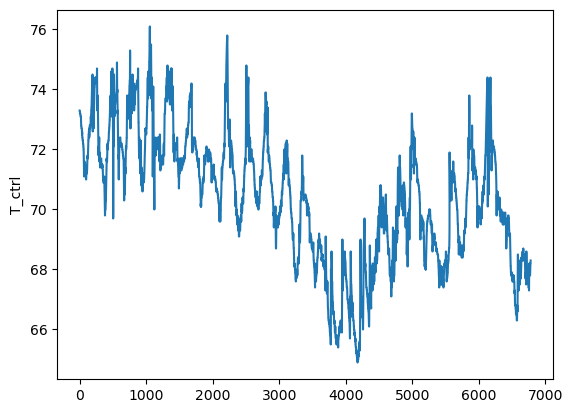

In [5]:
sns.lineplot(x=range(0,len(df['T_ctrl'])),y=df['T_ctrl'])

In [6]:
df_new = df.copy()
cols_2_keep = ['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'T_out', 'equip_run_heat','equip_run_cool', 'fan','mo']
# df_new.drop(df_new.columns.difference(cols_2_keep).values)
df_new.drop(df_new.columns.difference(cols_2_keep), 1, inplace=True)

c:\tools\Anaconda3\envs\build_obm\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


### Save/read to/from hdf5 format

In [7]:
df_new.to_hdf('sample_data1.h5', key='df_new', mode='w',format="table")
del [[df,df_new]]
gc.collect()

221

In [8]:
df_read = pd.read_hdf('sample_data1.h5')
df_read.head()

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,T_out,fan,mo,equip_run_heat,equip_run_cool
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,False,False,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,False,False,False


<AxesSubplot:xlabel='DateTime', ylabel='mo'>

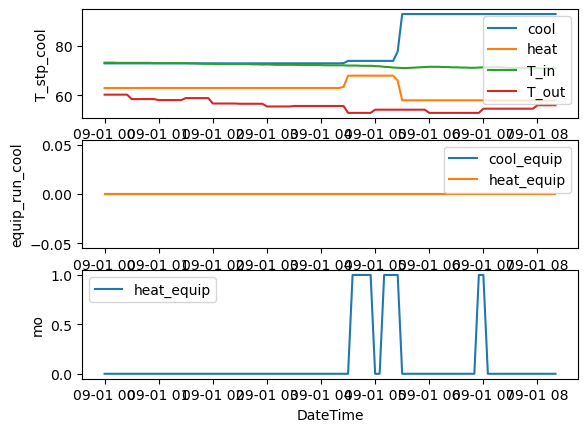

In [9]:
s_idx = 0
e_idx = 100
f,axes = plt.subplots(3,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_out'],label='T_out',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['mo'],label='heat_equip', ax=axes[2])


In [10]:
def smooth_setpoints(df,column):
    idx_DSP = df[df[column].diff() != 0].index.values
    idx_DSP_diff = np.diff(idx_DSP)
    idxes_2_begin = []
    idxes_2_end = []
    temp_idx = -1
    # Iterate over the difference of index values were dsp was found
    for idx, diff_value in enumerate(idx_DSP_diff):
        if idx <= temp_idx:
            continue
        
        # If the DSPs exists closely
        if diff_value < 3:

            idx_2_begin = idx_DSP[idx]
            idx_2_end = idx_DSP[idx+1]
            # Scan when the last consecutive DSP occurs
            for next_idx, next_idx_diff in enumerate(idx_DSP_diff[idx+1:]):
                if next_idx_diff <2:
                    idx_2_end = idx_DSP[idx+next_idx+2]
                    temp_idx = idx + next_idx + 1
                else:
                    break

            idxes_2_begin.append(idx_2_begin)
            idxes_2_end.append(idx_2_end)

    print(f"Starting and ending indices list differ by {len(idxes_2_begin)-len(idxes_2_end)}")
    return idxes_2_begin, idxes_2_end

In [11]:
stp_colmns = ['T_stp_cool', 'T_stp_heat']
for colm in stp_colmns:
    idxes_2_begin, idxes_2_end = smooth_setpoints(df_read,colm)
    for idx in range(0,len(idxes_2_begin)):
        start_idx = idxes_2_begin[idx]
        end_idx = idxes_2_end[idx]
        
        df_read.loc[start_idx:end_idx,colm] = df_read.iloc[end_idx][colm]

Starting and ending indices list differ by 0
Starting and ending indices list differ by 0


<AxesSubplot:xlabel='DateTime', ylabel='equip_run_cool'>

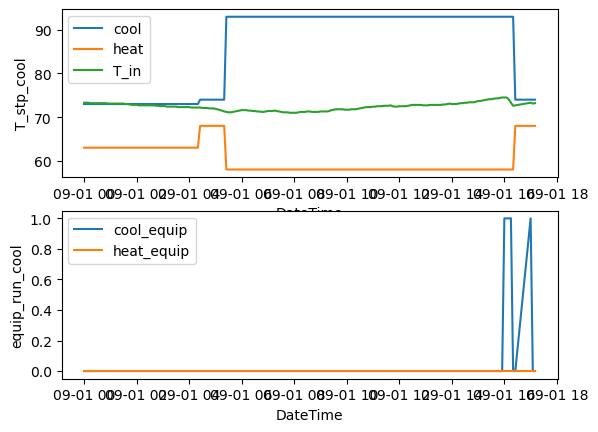

In [12]:
s_idx = 0
e_idx = 200
f,axes = plt.subplots(2,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])

In [13]:
df_read.to_hdf('sample_data1_stp_processed.h5', key='df_read', mode='w',format="table")

In [14]:
df_read[40:56]

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,T_out,fan,mo,equip_run_heat,equip_run_cool
40,2017-09-01 03:20:00,Sleep,Hold,72.4,73.0,63.0,52.0,55.5,0.0,False,False,False
41,2017-09-01 03:25:00,Sleep,Hold,72.4,73.0,63.0,52.0,55.5,0.0,False,False,False
42,2017-09-01 03:30:00,custom_3,Hold,72.4,73.0,63.0,53.0,55.7,0.0,False,False,False
43,2017-09-01 03:35:00,custom_3,Hold,72.3,73.0,63.0,53.0,55.7,0.0,False,False,False
44,2017-09-01 03:40:00,custom_3,Hold,72.3,73.0,63.0,53.0,55.7,0.0,False,False,False
45,2017-09-01 03:45:00,custom_3,Hold,72.3,73.0,63.0,53.0,55.7,0.0,False,False,False
46,2017-09-01 03:50:00,custom_3,Hold,72.3,73.0,63.0,53.0,55.7,0.0,False,False,False
47,2017-09-01 03:55:00,custom_3,Hold,72.3,73.0,63.0,54.0,55.7,0.0,False,False,False
48,2017-09-01 04:00:00,Sleep,Hold,72.3,73.0,63.0,53.0,55.7,0.0,False,False,False
49,2017-09-01 04:05:00,Sleep,Hold,72.2,73.0,63.0,52.0,55.7,0.0,False,False,False


In [15]:
df_read.DateTime.dt.weekday<=4

0        True
1        True
2        True
3        True
4        True
        ...  
6773    False
6774    False
6775    False
6776    False
6777    False
Name: DateTime, Length: 6778, dtype: bool

In [16]:
df_read['mdsp'] = (df_read['T_stp_heat'].diff() != 0) | (df_read['T_stp_cool'].diff() != 0) & (df_read['event'] == 'Hold')
weekday_df = df_read.loc[df_read.DateTime.dt.weekday < 5].copy()

In [17]:
weekday_df['mdsp'] = (weekday_df['T_stp_heat'].diff() != 0) | (weekday_df['T_stp_cool'].diff() != 0) & (weekday_df['event'] == 'Hold')
np.sum(weekday_df['mdsp'])

94

In [18]:
TM = {k : {0:{'2_override':0,'2_non_override': 0},1:{'2_override':0,'2_non_override': 0}} for k in range(0, int( 24 * 60 / 5))}
hours_list = list(range(0,24))*12
hours_list.sort()
minutes_list = list(range(0,56,5))*24

for timestep in range(0,288):
    
    if timestep == 0:
        cur_min = minutes_list[-1]
        cur_hour = hours_list[-1]
        next_min = minutes_list[0]
        next_hour = hours_list[0]
    else:
        cur_min = next_min
        cur_hour = next_hour
        next_min = minutes_list[timestep]
        next_hour = hours_list[timestep]

    idx_curr_non_override = [index for index,value in weekday_df.loc[(weekday_df.DateTime.dt.minute == cur_min) & (weekday_df.DateTime.dt.hour==cur_hour),'mdsp'].items() if value ==False]
    idx_curr_override = [index for index,value in weekday_df.loc[(weekday_df.DateTime.dt.minute == cur_min) & (weekday_df.DateTime.dt.hour==cur_hour),'mdsp'].items() if value == True]

    for idx in idx_curr_non_override:
        if idx == len(df_read):
            continue
        if df_read.loc[idx+1].mdsp == True:
            TM[timestep][0]['2_override'] += 1
        else: 
            TM[timestep][0]['2_non_override'] += 1

    for idx in idx_curr_override:
        if idx == len(df_read):
            continue
        if df_read.loc[idx+1].mdsp == True:
            TM[timestep][1]['2_override'] += 1
        else: 
            TM[timestep][1]['2_non_override'] += 1

    total_override_events = TM[timestep][1]['2_override'] + TM[timestep][1]['2_non_override']
    total_non_override_events = TM[timestep][0]['2_override'] + TM[timestep][0]['2_non_override']
    if total_override_events == 0:
        TM[timestep][1]['2_override'] = 0
        TM[timestep][1]['2_non_override'] = 1
    else:
        TM[timestep][1]['2_override'] =  TM[timestep][1]['2_override']/total_override_events
        TM[timestep][1]['2_non_override'] = TM[timestep][1]['2_non_override']/total_override_events
    if total_non_override_events == 0:
        TM[timestep][0]['2_override'] = 0
        TM[timestep][0]['2_non_override'] = 1    
    else:
        TM[timestep][0]['2_override'] = TM[timestep][0]['2_override']/total_non_override_events
        TM[timestep][0]['2_non_override'] = TM[timestep][0]['2_non_override']/total_non_override_events
TM

{0: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0.0, '2_non_override': 1.0}},
 1: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0.0, '2_non_override': 1.0}},
 2: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 3: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 4: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 5: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 6: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 7: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 8: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 9: {0: {'2_override': 0.0, '2_non_override': 1.0},
  1: {'2_override': 0, '2_non_override': 1}},
 10: {0: {'2

In [19]:
{'Timestep': {k : {'cur_state':{0:{'2_override':0,'2_non_override': 0},1:{'2_override':0,'2_non_override': 0}}} for k in range(0, int( 24 * 60 / 5))}}

{'Timestep': {0: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  1: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  2: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  3: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  4: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  5: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  6: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  7: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_non_override': 0}}},
  8: {'cur_state': {0: {'2_override': 0, '2_non_override': 0},
    1: {'2_override': 0, '2_n

In [20]:
TM = pd.DataFrame(columns=['timestep','cur_state','tp_2_0','tp_2_1'])

In [21]:
[list(range(0,288)), len([0, 1]*144), [0]*288, [0]*288]

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [22]:
TM = []
for timestep in range(0,288):
    TM.append([timestep, 0, 0, 0])
    TM.append([timestep, 1, 0, 0])

TM = pd.DataFrame(TM,columns=['time','cur_state','p_2_0','p_2_1'])
TM[(TM['time']== 0 ) & (TM['cur_state'] == 0)]['p_2_0']

0    0
Name: p_2_0, dtype: int64

In [23]:
TM = []
for timestep in range(0,288):
    TM.append([timestep, 0, 0, 0])
    TM.append([timestep, 1, 0, 0])

TM = pd.DataFrame(TM,columns=['time','cur_state','p_2_0','p_2_1'])
# {'Timestep': {k : {'cur_state':{0:{'2_override':0,'2_non_override': 0},1:{'2_override':0,'2_non_override': 0}}} for k in range(0, int( 24 * 60 / 5))}}
hours_list = list(range(0,24))*12
hours_list.sort()
minutes_list = list(range(0,56,5))*24

for timestep in range(0,288):
    
    if timestep == 0:
        cur_min = minutes_list[-1]
        cur_hour = hours_list[-1]
        next_min = minutes_list[0]
        next_hour = hours_list[0]
    else:
        cur_min = next_min
        cur_hour = next_hour
        next_min = minutes_list[timestep]
        next_hour = hours_list[timestep]

    idx_curr_non_override = [index for index,value in weekday_df.loc[(weekday_df.DateTime.dt.minute == cur_min) & (weekday_df.DateTime.dt.hour==cur_hour),'mdsp'].items() if value ==False]
    idx_curr_override = [index for index,value in weekday_df.loc[(weekday_df.DateTime.dt.minute == cur_min) & (weekday_df.DateTime.dt.hour==cur_hour),'mdsp'].items() if value == True]

    for idx in idx_curr_non_override:
        if idx == len(df_read):
            continue
        if df_read.loc[idx+1].mdsp == True:
            TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0), 'p_2_1'] += 1
        else: 
            TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0), 'p_2_0'] += 1

    for idx in idx_curr_override:
        if idx == len(df_read):
            continue
        if df_read.loc[idx+1].mdsp == True:
            TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_1'] += 1
        else: 
            TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1), 'p_2_0'] += 1

    total_override_events = TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_1'].values + TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_0'].values
    total_non_override_events = TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_1'].values + TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_0'].values
    if total_override_events == 0:
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_0'] = 1
    else:
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_1'] =  TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_1'].values/total_override_events
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_0'] = TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 1),'p_2_0'].values/total_override_events

    if total_non_override_events == 0:
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_0'] = 1    
    else:
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_1'] = TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_1'].values/total_non_override_events
        TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_0'] = TM.loc[(TM['time']== timestep ) & (TM['cur_state'] == 0),'p_2_0'].values/total_non_override_events
TM
TM.to_csv('TM_habitual.csv',index=False)

In [37]:
y = weekday_df['mdsp']
X = weekday_df.drop('mdsp',axis=1)
X = X.drop('DateTime',axis=1)
X = X.drop('schedule',axis=1)
X = X.drop('event',axis=1)

from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)


In [38]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

0.9978441638435479
0.9852262234533703


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testing_labels, preds,  labels = [0,1])

array([[1063,    2],
       [  14,    4]], dtype=int64)

In [44]:
np.sum(testing_labels)

18

In [48]:
f1_score(preds,testing_labels)

0.3333333333333333